In [98]:
from ema_workbench import (Model, RealParameter, ScalarOutcome)
from problem_formulation import get_model_for_problem_formulation, sum_over, sum_over_time
from ema_workbench.em_framework.optimization import (ArchiveLogger,
                                                     EpsilonProgress)

import pandas as pd
import matplotlib.pyplot as plt

# First, get the model
dike_model, planning_steps = get_model_for_problem_formulation(2)

# We will need experiments and outcomes, for the sake of scoping they are listed here
experiments, outcomes = (...,...)




In [100]:
results = pd.read_csv("directed search results/dike_model_policy_design_big_nfe.csv", index_col=0)
convergence = pd.read_csv("directed search results/dike_model_policy_design_convergence_big_nfe.csv") 

results.head()

# results.head()

print(dike_model.outcomes)
for o in dike_model.outcomes:
    print(o.name)



Expected Annual Damage
Dike Investment Costs
RfR Investment Costs
Evacuation Costs
Expected Number of Deaths
Total Investment Costs


In [101]:
from ema_workbench.analysis import parcoords

data = results.loc[:, [o.name for o in dike_model.outcomes]]
data = data[data['Expected Number of Deaths'] < 0.001]
data

,Expected Annual Damage,Dike Investment Costs,RfR Investment Costs,Evacuation Costs,Expected Number of Deaths,Total Investment Costs
0,0.000000e+00,1.536376e+08,61400000.0,0.000000,0.000000,2.150376e+08
12,8.096447e+06,1.461022e+08,30700000.0,263.562151,0.000885,1.768024e+08
13,6.951483e+06,1.160766e+08,84600000.0,224.507068,0.000779,2.006768e+08
24,0.000000e+00,1.299024e+08,84600000.0,0.000000,0.000000,2.145024e+08
25,0.000000e+00,1.569686e+08,0.0,0.000000,0.000000,1.569686e+08
28,6.400014e+06,1.557268e+08,0.0,206.823348,0.000716,1.557270e+08
29,6.028703e+06,1.097243e+08,115300000.0,137.395753,0.000978,2.250245e+08
32,8.811109e+04,1.490962e+08,61400000.0,4.082167,0.000005,2.104962e+08
42,4.842695e+06,1.491849e+08,30700000.0,184.570984,0.000314,1.798851e+08
50,0.000000e+00,1.138713e+08,115300000.0,0.000000,0.000000,2.291713e+08


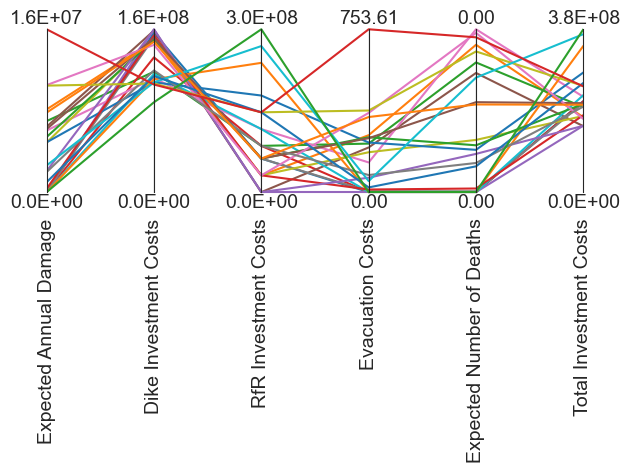

In [86]:


limits = parcoords.get_limits(data)
limits.loc[0, ['Expected Annual Damage', 'Dike Investment Costs', 'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths', 'Total Investment Costs']] = 0

formatter = {
    'Expected Annual Damage': '0.1E',
    'Dike Investment Costs': '0.1E',
    'RfR Investment Costs': '0.1E', 
    'Evacuation Costs': '.2f', 
    'Expected Number of Deaths': '.2f', 
    'Total Investment Costs': '0.1E',
}

paraxes = parcoords.ParallelAxes(limits, formatter)
paraxes.plot(data)
# plt.show()

In [92]:
my_archives = ArchiveLogger.load_archives("./directed search results/directed_search_convergence.tar.gz")
# # df = pd.concat(my_archives.values(), ignore_index=True)
# # df


# Iterate over each key (DataFrame) in the dictionary to remove the one empty column
for key in my_archives:
    # Drop the 'Unnamed: 0' column if it exists
    if 'Unnamed: 0' in my_archives[key].columns:
        my_archives[key] = my_archives[key].drop(columns=['Unnamed: 0'])
    # print(key)
    # print(my_archives[key])
    
    # # Check the 'Expected Number of Deaths' column and mark for removal if necessary
    # if 'Expected Number of Deaths' in my_archives[key].columns:
    #     if my_archives[key]['Expected Number of Deaths'].max() > 0.001:
    #         keys_to_remove.append(key)

# # Remove the marked keys from the dictionary
# for key in keys_to_remove:
#     del my_archives[key]


# # # Filter out DataFrames with 'Expected Number of Deaths' > 0.001
# # keys_to_remove = [key for key, df in my_archives.items() if df['Expected Number of Deaths'] > 0.00001]

# # for key in keys_to_remove:
# #     del my_archives[key]   

# # df = pd.concat(my_archives.values(), ignore_index=True)
# # df.head()
# # # df.info


In [105]:
# for key in my_archives:
#     # Drop the 'Unnamed: 0' column if it exists
#     if 'Unnamed: 0' in my_archives[key].columns:
#         my_archives[key] = my_archives[key].drop(columns=['Unnamed: 0'])
#     print(key)
#     # print(my_archives[key])
    
#     # Check the 'Expected Number of Deaths' column and mark for removal if necessary
#     if 'Expected Number of Deaths' in my_archives[key].columns:
#         if my_archives[key]['Expected Number of Deaths'].max() > 0.001:
#             keys_to_remove.append(key)

df = pd.concat(my_archives.values(), ignore_index=True)
df.head()


# Example lengths of the original DataFrames in my_archives
lengths = my_archives.keys() #[len(df1), len(df2), len(df3)]  # Replace with actual lengths
keys = my_archives.keys()#['key1', 'key2', 'key3']  # Replace with actual keys

# Assuming df is already defined
# Create an empty dictionary to store the split DataFrames
reconstructed_archives = {}

# Initialize the start index
start_idx = 0

# Iterate over lengths and keys to reconstruct the dictionary
for key, length in zip(keys, lengths):
    end_idx = start_idx + length
    reconstructed_archives[key] = df.iloc[start_idx:end_idx].reset_index(drop=True)
    start_idx = end_idx

# for key in reconstructed_archives:
#     print(key)
#     print(reconstructed_archives[key])

C:\Users\emma\AppData\Local\Temp\ipykernel_29956\1148754137.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(my_archives.values(), ignore_index=True)


In [95]:
from ema_workbench import HypervolumeMetric
from ema_workbench.em_framework.optimization import to_problem

reference_set = results
problem = to_problem(dike_model, searchover="levers")
reference_set.columns


Index(['0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0', '1_RfR 1', '1_RfR 2',
       '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0', '3_RfR 1', '3_RfR 2',
       '4_RfR 0', '4_RfR 1', '4_RfR 2', 'EWS_DaysToThreat',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'Expected Annual Damage', 'Dike Investment Costs',
       'RfR Investment Costs', 'Evacuation Costs', 'Expected Number of Deaths',
       'Total Investment Costs'],
      dtype='object')

In [96]:
import numpy as np

hv = HypervolumeMetric(reference_set, problem)

hypervolume = []
print(len(my_archives.items()))


# Iterate through my_archives and calculate hypervolume for each entry
for nfe, my_archive in my_archives.items():
    # Calculate hypervolume
    hypervolume_value = hv.calculate(my_archive)
    
    # Append (nfe, hypervolume_value) tuple to hypervolume list
    hypervolume.append((nfe, hypervolume_value))
    
    # Print progress report
    print(f"Progress: Calculated hypervolume for {nfe} NFEs")
    
# Sort hypervolume list based on the first element (nfe)
hypervolume.sort(key=lambda x: x[0])

# Convert hypervolume list to numpy array
hypervolume = np.asarray(hypervolume)


12
Progress: Calculated hypervolume for 0 NFEs
Progress: Calculated hypervolume for 100 NFEs
Progress: Calculated hypervolume for 11099 NFEs
Progress: Calculated hypervolume for 1191 NFEs
Progress: Calculated hypervolume for 2283 NFEs
Progress: Calculated hypervolume for 3376 NFEs
Progress: Calculated hypervolume for 4467 NFEs
Progress: Calculated hypervolume for 5559 NFEs
Progress: Calculated hypervolume for 6654 NFEs
Progress: Calculated hypervolume for 7743 NFEs
Progress: Calculated hypervolume for 8829 NFEs
Progress: Calculated hypervolume for 9917 NFEs


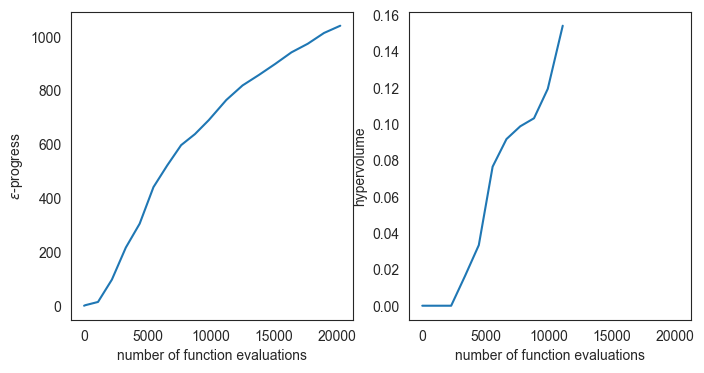

In [102]:
#Time 14:37
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(8,4))
ax1.plot(convergence.nfe, convergence.epsilon_progress)
ax1.set_ylabel('$\epsilon$-progress')
ax2.plot(hypervolume[:, 0], hypervolume[:, 1])
ax2.set_ylabel('hypervolume')

ax1.set_xlabel('number of function evaluations')
ax2.set_xlabel('number of function evaluations')
plt.show()

In [ ]:
#Filter for candidate solutions
#filter based on prim results
#Do epsilon progress instead: get metrics


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\emma\\Desktop\\Master\\Model based decision making\\MBDM_model_Delata_comission_2024\\final assignment\\archives\\tmp'